In [0]:
import pandas as pd
import numpy as np #converting data into array
import matplotlib.pyplot as plt
import seaborn as sns#histogram graph
from sklearn.model_selection import train_test_split#convert testing and tarining set
from sklearn.preprocessing import LabelEncoder#converting text into numeric format
from keras.models import Model#is to build neural network
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop#
from keras.preprocessing.text import Tokenizer#for tokenize data
from keras.preprocessing import sequence
from keras.utils import to_categorical#convert data into categorical format
from keras.callbacks import EarlyStopping

In [8]:
df = pd.read_csv('sms.csv',encoding = 'latin-1')#latin-1 for reqading not text char
df.head()#first 5 entries

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
#to see number of rows in data set
df.shape

(5572, 5)

In [10]:
#to check columns names
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [51]:
#x input and y output
x = df.v2 #v2 col name
y = df.v1 #v1 col name
#check data 
x.head()

np.unique(y)

array(['ham', 'spam'], dtype=object)

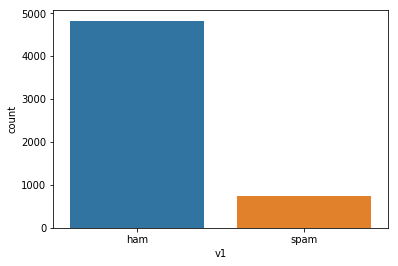

In [52]:
#show the bar chart ny counting the entries
sns.countplot(y)

In [53]:
#OUTPUT VARIBALE Y is in ham and spam format to convert in numeric format 
le = LabelEncoder()
y = le.fit_transform(y)#conver into binary
y#print

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
#array converted into matric
y = y.reshape(-1,1)
y#print

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [55]:
#shape of y
y.shape

#preprocessing of output varible y is finished

(5572, 1)

In [0]:
#input Varibale x
#spliting data x&ytarin => 85% x%ytest=>15%
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.15)#to keep accuracy consistant use random_state=0


In [57]:
#check length
len(x)

5572

In [58]:
len(X_train)

4736

In [59]:
len(X_test)

836

In [76]:
#
max_words = 1000
max_len = 150
tok = Tokenizer(num_words = max_words)#tokenzied word into numeric
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen = max_len)#convert matrix into 2d
sequences_matrix

array([[  0,   0,   0, ...,   3, 422,  10],
       [  0,   0,   0, ...,  29,  39, 423],
       [  0,   0,   0, ...,  30,   6,  70],
       ...,
       [  0,   0,   0, ...,  82, 111,  21],
       [  0,   0,   0, ...,   4,  56,   3],
       [  0,   0,   0, ..., 282,   2,   3]], dtype=int32)

In [61]:
sequences_matrix.shape

(4736, 150)

In [0]:
#RNN
#

def RNN():
  inputs = Input(name = 'inputs',shape = [max_len])#
  layer = Embedding(max_words,50,input_length = max_len)(inputs)#
  layer = LSTM(64)(layer)#lstm convert 64 inputs,lstm is possible only in RNN
  layer = Dense(256,name = 'FC1')(layer)#dense 256 inputs,common hidden layer
  layer = Activation('relu')(layer)#
  layer = Dropout(0.5)(layer)#dropout rate unimportant input dropout
  layer = Dense(1,name='out_layer')(layer)#
  layer = Activation('sigmoid')(layer)#
  model = Model(inputs=inputs,outputs=layer)#
  return model

In [0]:
model = RNN()

In [64]:
#summary show the properties of model 
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [0]:
#to improve accuracy we compile
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [79]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=25,validation_split=0.2,
          callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3788 samples, validate on 948 samples
Epoch 1/25
3788/3788 [==============================] - 8s 2ms/step - loss: 0.2755 - acc: 0.9071 - val_loss: 0.1359 - val_acc: 0.9568
Epoch 2/25
3788/3788 [==============================] - 7s 2ms/step - loss: 0.1131 - acc: 0.9633 - val_loss: 0.0890 - val_acc: 0.9757
Epoch 3/25
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0718 - acc: 0.9776 - val_loss: 0.0750 - val_acc: 0.9852
Epoch 4/25
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0549 - acc: 0.9842 - val_loss: 0.0751 - val_acc: 0.9852


In [80]:
X_train.head()

3061                            Fine. Do you remember me.
5444    Good morning. At the repair shop--the ONLY rea...
4738                              We have pizza if u want
2267                                    Finish liao... U?
4453                 I'm home. Ard wat time will u reach?
Name: v2, dtype: object

In [0]:
#evaluate model on testing data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen = max_len) 

In [73]:
accr = model.evaluate(test_sequences_matrix,Y_test)

836/836 [==============================] - 1s 604us/step


In [85]:
print('Test set\n Loss:{:0.3f}\n Accuracy:{:0.3f}'.format(accr[0],accr[1]))

Test set
 Loss:0.093
 Accuracy:0.975
